# Case Study: Medifor
This notebook looks at the differences between different train and test datasets.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts

from scripts import clustering
from scripts import misclassification
from scripts import removal

dataset1='MFC19_EvalPart1'
dataset2='mfc19_mfc20'
tree_type='lgb'
tree_kernel='leaf_output'
data_dir='../../data/'

## Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

### NC17 (Original features)
We first plot the similarity between data points using the original feature space:

train set acc: 0.977384
train log loss: 0.08833
train auroc: 0.998
test set acc: 0.928883
test log loss: 0.17778
test auroc: 0.979
concatenating X_train and X_test...
PCA 58 to 50...
embedding with tsne...


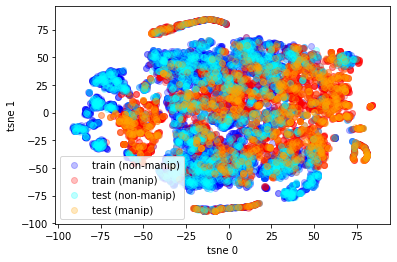

In [5]:
args = clustering.Args()
args.dataset=dataset1
args.tree_type=tree_type
args.tree_kernel='None'
args.data_dir=data_dir
clustering.main(args)

### NC17 (Tree-extracted feature space)
Now we perform the same procedure, except this time with the tree-extracted feature representation:

train set acc: 0.977384
train log loss: 0.08833
train auroc: 0.998
test set acc: 0.928883
test log loss: 0.17778
test auroc: 0.979
concatenating X_train and X_test...
transforming features with TREX...
PCA 100 to 50...
embedding with tsne...


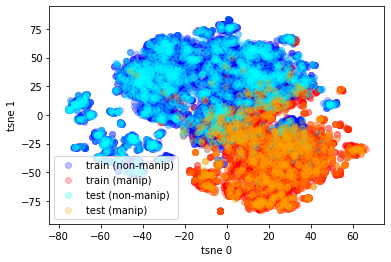

In [7]:
args = clustering.Args()
args.dataset=dataset1
args.tree_type=tree_type
args.tree_kernel=tree_kernel
args.data_dir=data_dir
clustering.main(args)

### NC17 (Train) and MFC18 (Test)
Now we apply the same process to two slightly different datasets: NC17 (train) and MFC18 (test), where we can see there is a clear separation between the positive and negative classes for the training set, but not for the test set:

train set acc: 0.891703
train log loss: 0.26997
train auroc: 0.954
test set acc: 0.737289
test log loss: 0.57229
test auroc: 0.778
concatenating X_train and X_test...
transforming features with TREX...
PCA 100 to 50...
embedding with tsne...


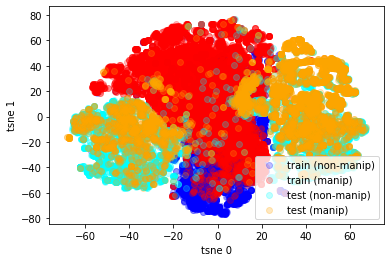

In [9]:
args = clustering.Args()
args.dataset=dataset2
args.tree_type=tree_type
args.tree_kernel=tree_kernel
args.data_dir=data_dir
clustering.main(args)

## Understanding Misclassified Test Instances
This section chooses an incorrectly predicted test instance and shows several persepctives:
1. Based on SHAP estimation, we found the feature `lstmwresampling` to have the most impact on the model's prediction of this instance. Thus, we plot the distribution of this feature's values for positive training samples (y=1) and negative training samples (y=0); this plot is shown in the first row of plots on the left. Next, we use TREX's weights for each sample and plot the distribution as weighted density (middle). Finally, we plot a weighted density using the weights x the similarities of the training instances to the test instance.
2. The second row of plots show two distributions: one is the overall weight distribution of the training samples generated by TREX (global explanation). The second is the similarity x weight distribution, where similarity is the similarity of the training samples to the test instance (local explanation).

train instances: 20,213
test instances: 16,029
no. features: 18

train set acc: 0.891703
train log loss: 0.26997
train auroc: 0.954
test set acc: 0.737289
test log loss: 0.57229
test auroc: 0.778
building TREX...
generating predictions...
generating probabilities...

test index: 439, label: 0
[0 0 1 ... 0 0 0]
[0.06101553 0.1522656  0.51854624 ... 0.38864064 0.09619932 0.30367249]
[0 0 1 ... 0 0 0]
[1.44143677e-04 2.19453213e-03 6.11961497e-01 ... 2.03806802e-01
 5.66924305e-04 6.93976515e-02]
tree pred: 1 (0.995)
TREX pred: 1 (1.000)

computing most influential features...
c_mayachitra_steg_hollistic_hv_grpc_ver_1, index: 1, val: 1.0, shap val: 1.8176339449520729


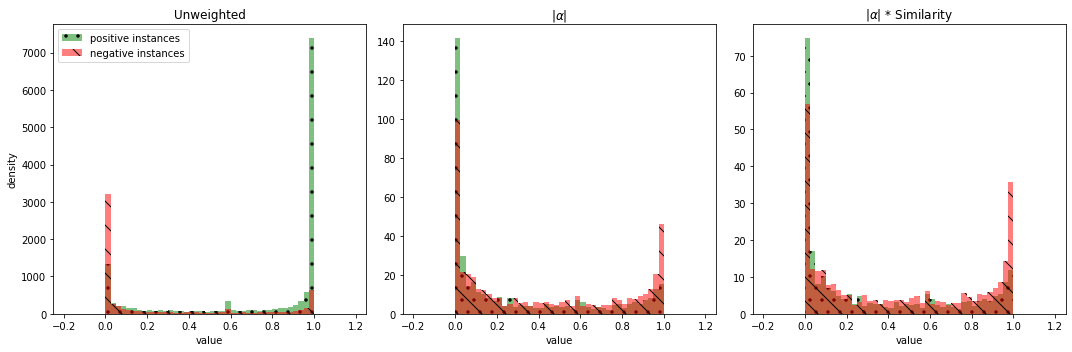

kitware_holistic_image_v19, index: 8, val: 0.9948022365570068, shap val: 0.9178511344394497


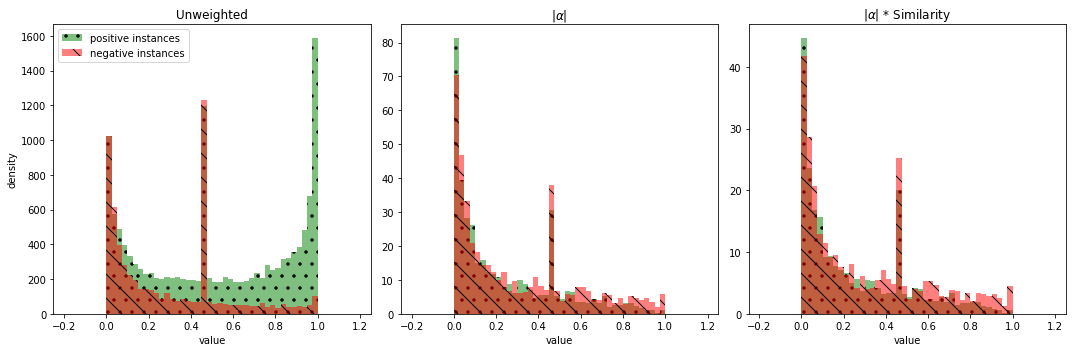

kitware_holistic_image_v18, index: 7, val: 0.9999674558639526, shap val: 0.810741488967197


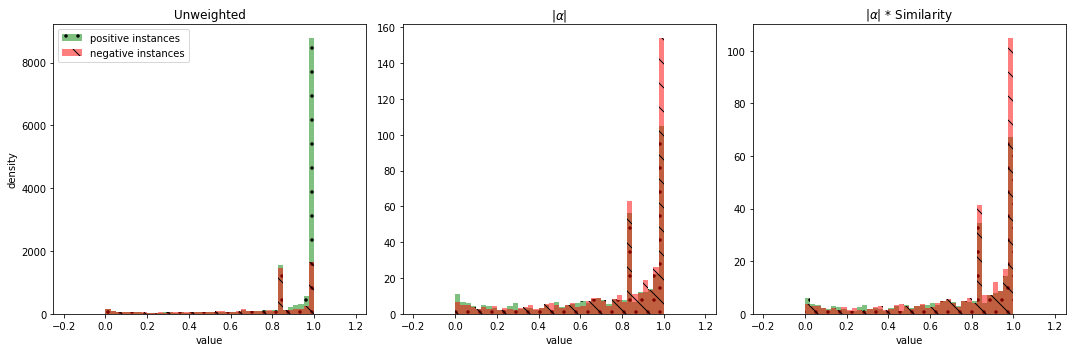

c_mayachitra_steg_hollistic_hv_grpc_ver_2, index: 2, val: 1.0, shap val: 0.490424979884025


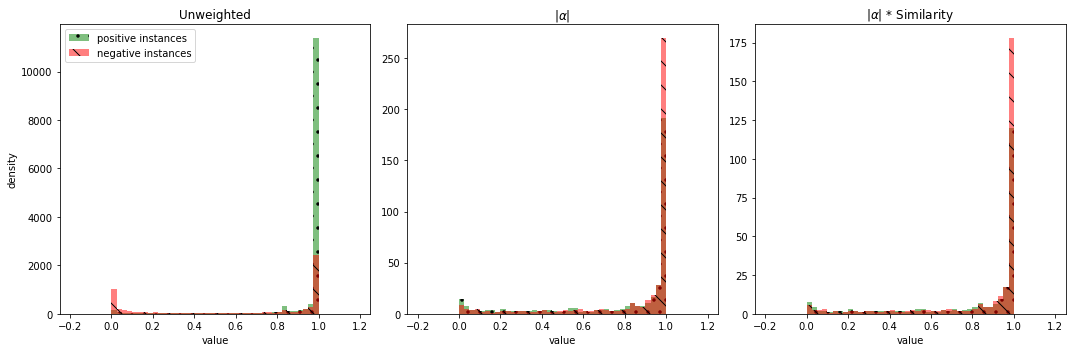

inhadq, index: 5, val: 0.9752095340000001, shap val: 0.37786453969596356


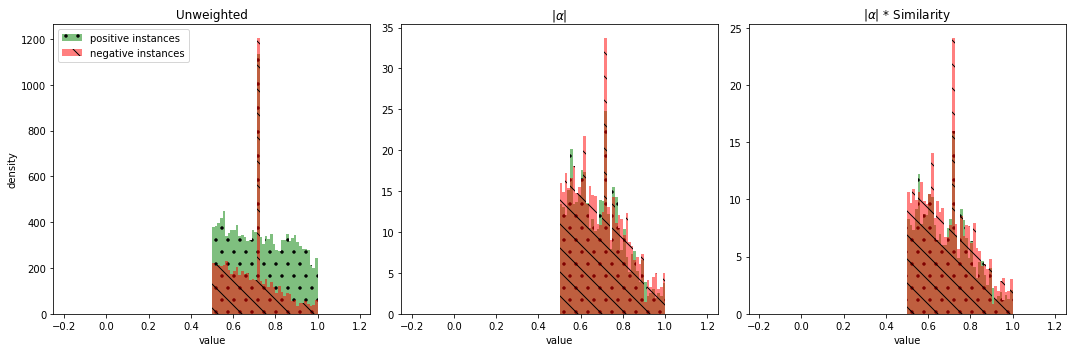

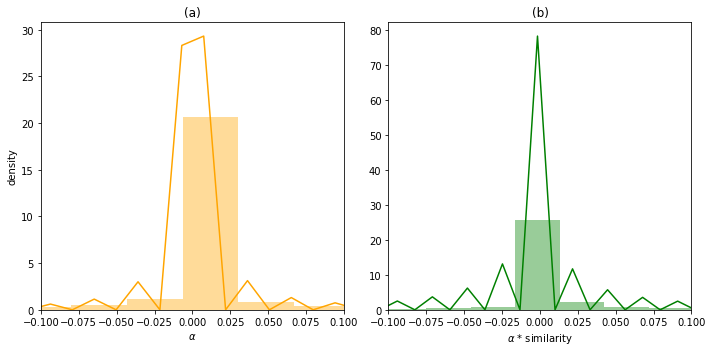

In [2]:
args = misclassification.Args()
args.dataset='mfc19_mfc20'
args.tree_type=tree_type
args.tree_kernel=tree_kernel
args.data_dir=data_dir
args.xlim=0.1
args.max_bins=40
args.rs=2
misclassification.main(args)

## Removing Harmful Training Samples
This section randomly samples a fraction of the misclassified test instances, computes the sum contributions of each training sample to those instances, and removes the ones (in batches) with the highest negative contributions. The model is then retrained after each removal and it's performance on the test set is computed.

In [3]:
args = removal.Args()
args.dataset=dataset2
args.tree_type=tree_type
args.tree_kernel=tree_kernel
args.data_dir=data_dir
args.n_iterations=5
args.n_remove=200
removal.main(args)

train instances: 20,213
val instances: 16,029
no. features: 18

train set acc: 0.891703
train log loss: 0.26997
train auroc: 0.954
test set acc: 0.737289
test log loss: 0.57229
test auroc: 0.778


ValueError: operands could not be broadcast together with shapes (10,20213) (7333,) 